<a href="https://colab.research.google.com/github/sofia-sunny/Introductory_Tutorials/blob/main/03_Descriptor_Activity_Relation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Relationship Between Molecular Descriptors and Activity**
Molecular descriptors are crucial for understanding **how chemical structure relates to biological activity.** They quantify specific features of a molecule—such as size, shape, electronic properties, and hydrophobicity—that often influence how that molecule interacts with a biological target like a protein or enzyme.

For example, consider **logP**, which measures how hydrophobic a molecule is (i.e., its preference for lipid vs. aqueous environments). A drug with very high logP may easily cross cell membranes but may also accumulate in fatty tissues and have poor solubility in blood. On the other hand, molecular weight **(MolWt)** can influence a molecule’s ability to be absorbed or metabolized; too large a molecule may not pass through biological membranes effectively.

Suppose we have a dataset of 20 molecules tested for inhibitory activity against an enzyme. Each molecule has a measured **activity value** (e.g., IC₅₀ or binding affinity) and several calculated descriptors like MolWt, MolLogP, NumHDonors, and TPSA. By examining how these descriptors vary with activity we might find that molecules with moderate logP values tend to have higher activity. This suggests that hydrophobicity plays a role in how well these molecules bind to the target.

In this notebook, we will explore how to uncover and visualize the relationship between selected molecular descriptors and the activity of a set of molecule

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 12.6 MB/s eta 0:00:00


### **Descriptors module**
The `Descriptors module` in rdkit.Chem provides a convenient way to calculate a wide variety of molecular properties that are commonly used as descriptors in cheminformatics.

These descriptors are functions that take an RDKit molecule object **(Mol)** as input and return numerical values representing molecular features such as molecular weight (**MolWt**), logP (**MolLogP**), number of hydrogen bond donors (**NumHDonors**), number of rotatable bonds (**NumRotatableBonds**), and many others.

In [2]:
# Import necessary libraries
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

### **SMILES** and **activity data** (e.g., IC50 values) for a set of compounds.
We first create a dictionary called data. This dictionary  contains information about chemical molecules using their **SMILES** representation and their **corresponding activity** values. The keys of the dictionary are SMILES and Activity

In [18]:
data = {
    'SMILES': [
        'CC(=O)OC1=CC=CC=C1C(=O)O',    # Aspirin
        'CCOC1=CC=CC=C1C(=O)O',        # Ethyl salicylate
        'CCN1C=NC2=C1C=CC=C2',         # Caffeine-like
        'CCO',                         # Ethanol
        'CC(C)CC1=CC=C(C=C1)O',        # Propofol
        'C1=CC=C(C=C1)C=O',            # Benzaldehyde
        'CC(C)NCC(O)COC1=CC=CC=C1',    # Propranolol
        'CC1=CC(=O)NC(=O)N1',          # Paracetamol
        'C1=CC=C(C=C1)O',              # Phenol
        'CN1C=NC2=C1C(=O)N(C(=O)N2)C'  # Theobromine
    ],
    'Activity': [0.5, 0.8, 0.2, 0.08, 0.75, 0.3, 0.9, 0.6, 0.4, 0.25]
}



Then we create a df from the data dictionary

In [19]:
df = pd.DataFrame(data)
df

,SMILES,Activity
0,CC(=O)OC1=CC=CC=C1C(=O)O,0.50
1,CCOC1=CC=CC=C1C(=O)O,0.80
2,CCN1C=NC2=C1C=CC=C2,0.20
3,CCO,0.08
4,CC(C)CC1=CC=C(C=C1)O,0.75
5,C1=CC=C(C=C1)C=O,0.30
6,CC(C)NCC(O)COC1=CC=CC=C1,0.90
7,CC1=CC(=O)NC(=O)N1,0.60
8,C1=CC=C(C=C1)O,0.40
9,CN1C=NC2=C1C(=O)N(C(=O)N2)C,0.25


###**Calculate molecular descriptorst.**
Now we want to calculate the molecular descriptors for each smiles. First we create some empty lists to put the descriptors in them

In [20]:
# Initialize empty lists for descriptors
mol_wt_list = [] # list for Molecular Weight
logp_list = [] # list for logP
hbd_list = [] # list for number of Hydrogen bond donors
hba_list = [] # list for number of Hydrogen bond acceptors


In [21]:
# Calculate descriptors for each SMILES
for smiles in df['SMILES']:
    mol = Chem.MolFromSmiles(smiles)
    mol_wt_list.append(round(Descriptors.MolWt(mol), 2))
    logp_list.append(round(Descriptors.MolLogP(mol), 2))
    hbd_list.append(round(Descriptors.NumHDonors(mol), 2))
    hba_list.append(round(Descriptors.NumHAcceptors(mol), 2))



Check two lists as example:

In [22]:
mol_wt_list

[180.16, 166.18, 146.19, 46.07, 150.22, 106.12, 209.29, 126.11, 94.11, 180.17]

In [23]:
logp_list

[1.31, 1.78, 2.06, -0.0, 2.59, 1.5, 1.42, -0.63, 1.39, -1.04]

Add descriptors to the DataFrame so each descriptor will have a column

In [26]:
# Add descriptors to the DataFrame
df['MolWt'] = mol_wt_list
df['LogP'] = logp_list
df['HBD'] = hbd_list
df['HBA'] = hba_list

### **Check created df:**

In [27]:
df

,SMILES,Activity,MolWt,LogP,HBD,HBA
0,CC(=O)OC1=CC=CC=C1C(=O)O,0.50,180.16,1.31,1,3
1,CCOC1=CC=CC=C1C(=O)O,0.80,166.18,1.78,1,2
2,CCN1C=NC2=C1C=CC=C2,0.20,146.19,2.06,0,2
3,CCO,0.08,46.07,-0.00,1,1
4,CC(C)CC1=CC=C(C=C1)O,0.75,150.22,2.59,1,1
5,C1=CC=C(C=C1)C=O,0.30,106.12,1.50,0,1
6,CC(C)NCC(O)COC1=CC=CC=C1,0.90,209.29,1.42,2,3
7,CC1=CC(=O)NC(=O)N1,0.60,126.11,-0.63,2,2
8,C1=CC=C(C=C1)O,0.40,94.11,1.39,1,1
9,CN1C=NC2=C1C(=O)N(C(=O)N2)C,0.25,180.17,-1.04,1,5


### **Which descriptors show a significant correlation with activity?**
We can use a **heatmap** to explore how each molecular descriptors  correlate with the  activity of compounds and see which descriptors have a strong positive or negative relationship with activity. This can guide us in selecting **the most informative descriptors** for further analysis or modeling.

A value close to 1 or -1 means a strong relationship.
A value close to 0 means little or no correlation.

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

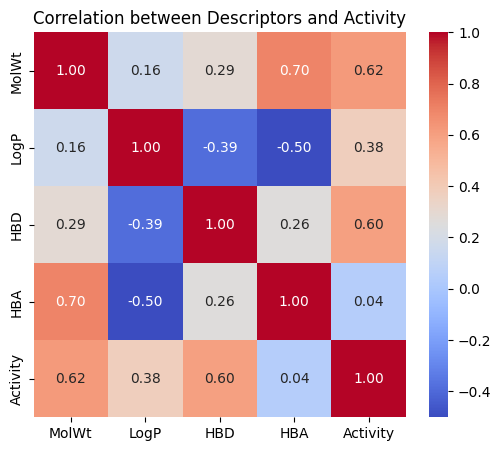

In [34]:
# Compute correlation matrix
correlation_matrix = df[['MolWt', 'LogP', 'HBD', 'HBA', 'Activity']].corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Descriptors and Activity")
plt.show()


### **Key Observations from this heatmap**

| Descriptor | Correlation with Activity | Strength of Correlation | Interpretation                                                         |
| ---------- | ------------------------- | ----------------------- | ---------------------------------------------------------------------- |
| **MolWt**  | 0.62                      | Moderate                | Activity tends to increase as molecular weight increases.              |
| **LogP**   | 0.38                      | Weak to Moderate        | Slight tendency for more hydrophobic molecules to be more active.      |
| **HBD**    | 0.60                      | Moderate                | Molecules with more hydrogen bond donors tend to have higher activity. |
| **HBA**    | 0.04                      | None                    | No meaningful relationship with activity.                              |



Among the four molecular descriptors analyzed, Molecular Weight **(MolWt)** and Hydrogen Bond Donors **(HBD)** exhibit the highest positive correlation values with biological activity—0.62 and 0.60 respectively. This means that, within the given dataset, molecules that have higher molecular weight or contain more hydrogen bond donor groups tend to be more biologically active.

This is significant because it suggests that size (captured by MolWt) and the molecule’s ability to form hydrogen bonds (captured by HBD) may play an important role in how well a compound can interact with its biological target. Therefore, these two descriptors may be more influential in driving or predicting biological effects in this particular set of compounds. This insight can be valuable when selecting or designing new molecules with higher chances of being biologically active.

**LogP** has a weaker but still noticeable relationship, while **HBA** appears unrelated in this case.